# Titanic Data Project Analysis


In [ ]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load and Read Data

In [ ]:
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('/content/gdrive/MyDrive/Projects/Titanic-Data-Analysis/datasets/train.csv')

# Let's see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# find categorical values
for col in titanic_df.columns:
     if (titanic_df[col].nunique() < 10):
        print(f"{col}: {titanic_df[col].unique()}")

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' nan]


Parameters Expalnation

*   Pclass : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
*   SibSp : # of siblings / spouses aboard the Titanic
*   Parch : # of parents / children aboard the Titanic
*   Embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)








In [ ]:
# read and combine both train and test
train_df = pd.read_csv('/content/gdrive/MyDrive/Projects/Titanic-Data-Analysis/datasets/train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/Projects/Titanic-Data-Analysis/datasets/test.csv');
combined_df= pd.concat([train_df, test_df]) 

## Analysis and Visualization

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

*   Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
*   What deck were the passengers on and how does that relate to their class?
*   Where did the passengers come from?
*   Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

*   What factors helped someone survive the sinking?

So let's start with the first question: Who were the passengers on the titanic?

In [ ]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Overall Analysis**

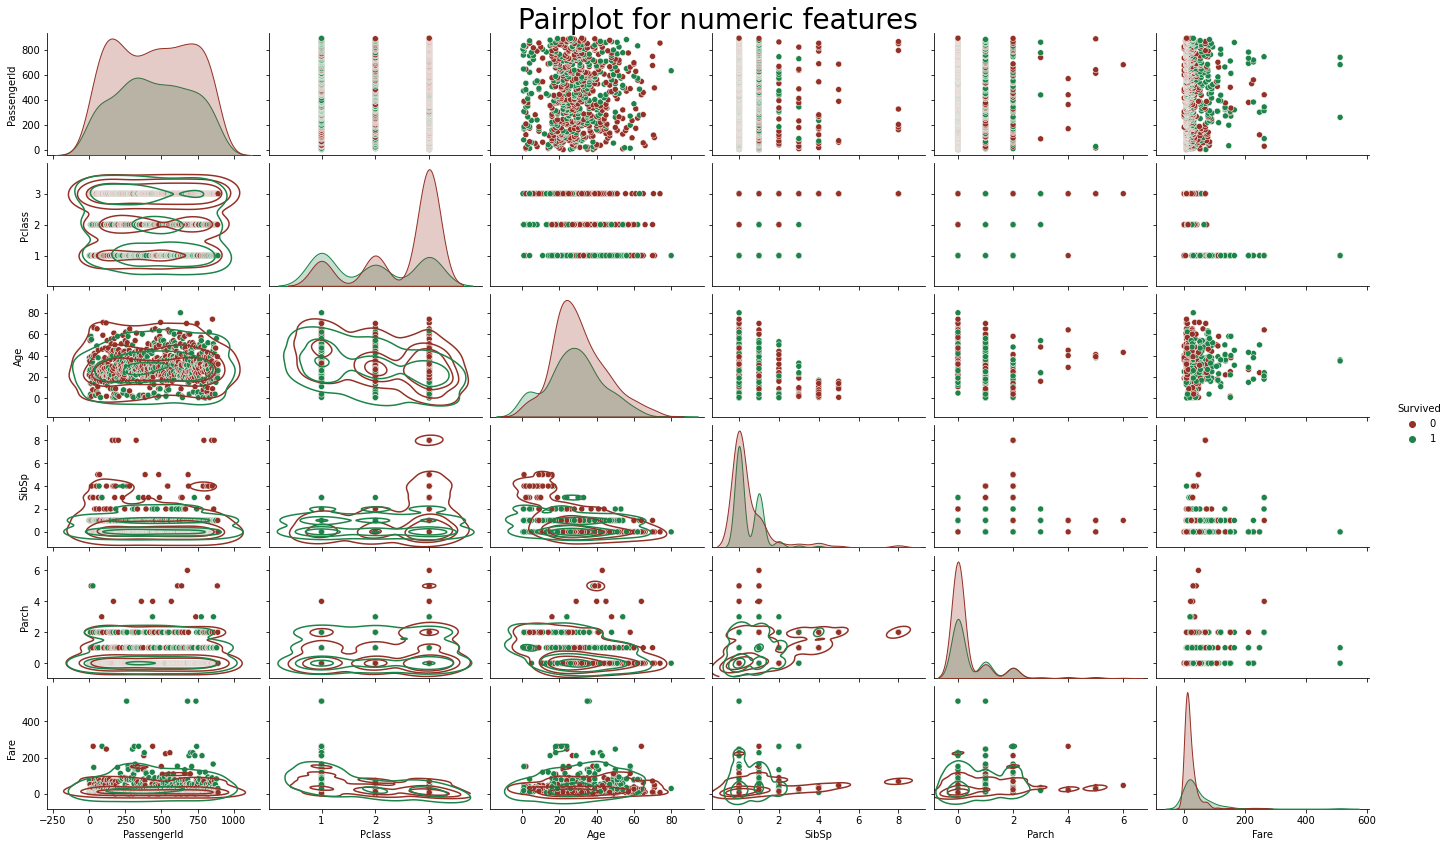

In [ ]:
survival_pal = {0: "#943126", 1:"#1D8348"}
screening_df = titanic_df.copy()
g = sns.pairplot(screening_df, hue="Survived", palette = survival_pal ,height=2, aspect=1.63)
g.map_lower(sns.kdeplot, levels=4, color="#424949")
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot for numeric features", fontsize="28");

### **Probability of Survival**


In [ ]:
# What was the overall chance to survive?
print(f"Overall probability to survive: {round(len(screening_df[screening_df['Survived'] == 1]) / len(screening_df), 3) * 100} %")

Overall probability to survive: 38.4 %


### **Fare and Class**

Text(0.5, 0.98, 'Fare-Distribution for each class')

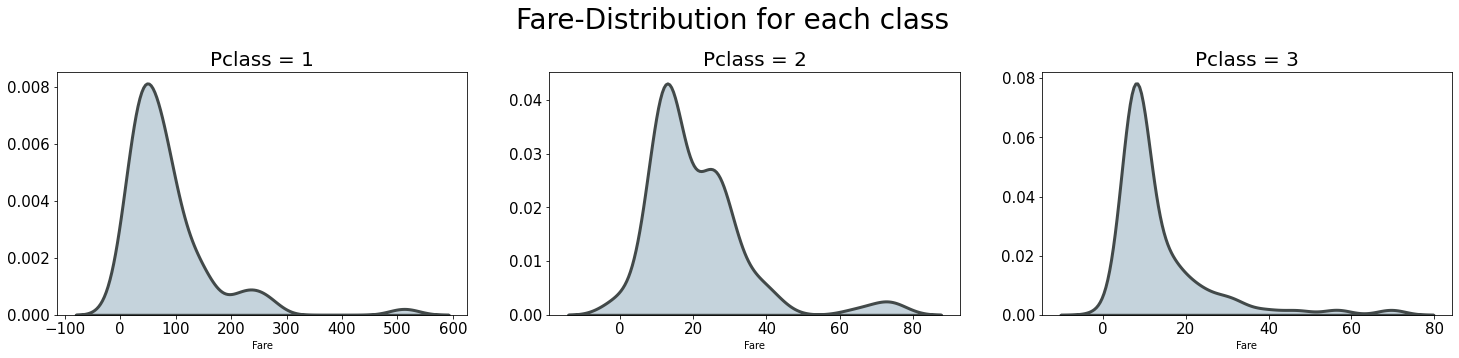

In [ ]:
# build figure
fig = plt.figure(figsize=(25,5))

# add grid to figure
gs = fig.add_gridspec(1,3)

# fill grid with subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# adjust subheadline fontsize
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# adjust lable fontsize
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# plot data into subplots 
sns.kdeplot(data=screening_df[screening_df['Pclass']==1], x="Fare", color="#1A5276", fill = True, ax=ax0, linewidth = 3, ec="#424949").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==2], x="Fare", color="#1A5276", fill = True, ax=ax1, linewidth = 3, ec="#424949").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==3], x="Fare", color="#1A5276", fill = True, ax=ax2, linewidth = 3, ec="#424949").set(xlabel="Fare", ylabel="")

# add headline
fig.subplots_adjust(top=0.8)
fig.suptitle('Fare-Distribution for each class', fontsize="28")

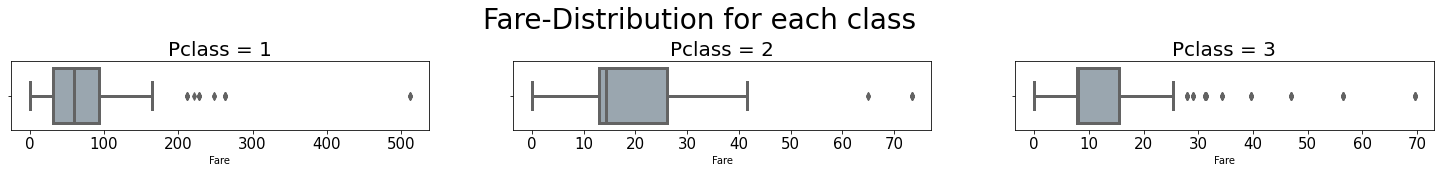

In [ ]:
# build figure
fig = plt.figure(figsize=(25.5,2))

# add grid to figure
gs = fig.add_gridspec(1,3)

# fill grid with subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# adjust subheadline fontsize
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# adjust lable fontsize
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# plot data into subplots 
sns.boxplot(x="Fare",data=screening_df[screening_df['Pclass']==1], orient="h", color="#97A7B2", ax=ax0, linewidth = 3).set(xlabel="Fare")
sns.boxplot(x="Fare",data=screening_df[screening_df['Pclass']==2], orient="h", color="#97A7B2", ax=ax1, linewidth = 3).set(xlabel="Fare")
sns.boxplot(x="Fare",data=screening_df[screening_df['Pclass']==3], orient="h", color="#97A7B2", ax=ax2, linewidth = 3).set(xlabel="Fare")

# add headline
fig.subplots_adjust(top=0.6)
fig.suptitle('Fare-Distribution for each class', fontsize="28");

### **Gender and Age**

### Gender Distribution

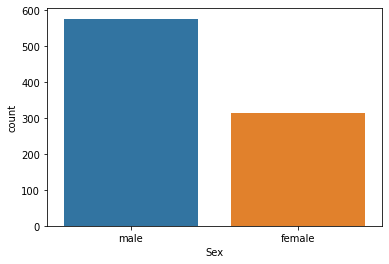

In [ ]:
sns.countplot(x = 'Sex',data = titanic_df)

### Gender Distribution by Class

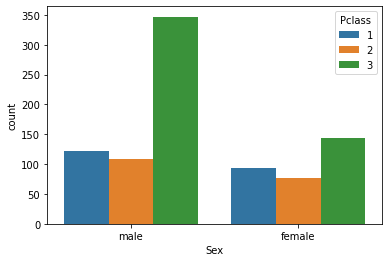

In [ ]:
sns.countplot(x = 'Sex',data = titanic_df, hue = 'Pclass')

### Class Distribution by Gender

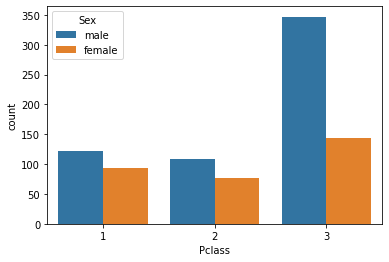

In [ ]:
sns.countplot(x = 'Pclass',data = titanic_df, hue = 'Sex')

In [ ]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# Revisit Lecture 45 for a refresher on how to do this.

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

This means that any passenger younger than 16 years old will be replaced by CHILD instead of MALE or FEMALE

In [ ]:
# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [ ]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


### Class Distribtuion by Person

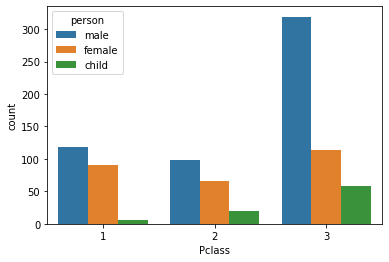

In [ ]:
sns.countplot(x = 'Pclass',data = titanic_df, hue = 'person')

### Age Distribtuion 

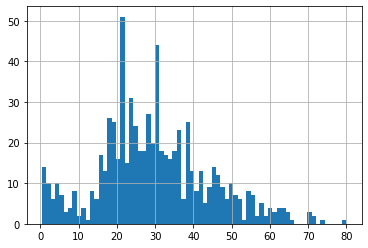

In [ ]:
titanic_df['Age'].hist(bins = 70)

### Passengers Mean Age

In [ ]:
mean_age = titanic_df['Age'].mean()
print('Average Passengers Age is:', mean_age )

Average Passengers Age is: 29.69911764705882


### Count of Person Column

In [ ]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

###  Age Kernel Density Estimate for Gender

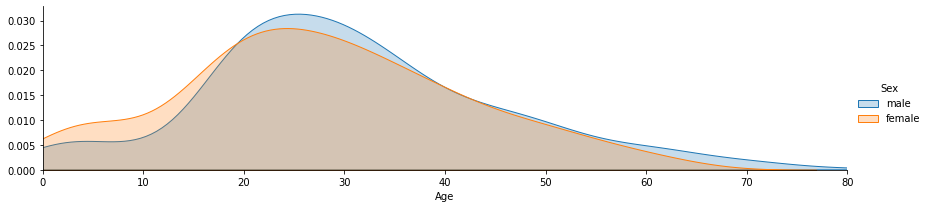

In [ ]:
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()
# set the figure limit for age from 0 to oldest
fig.set(xlim = (0, oldest))
# add figure legend
fig.add_legend()

###  Age Kernel Density Estimate for Person

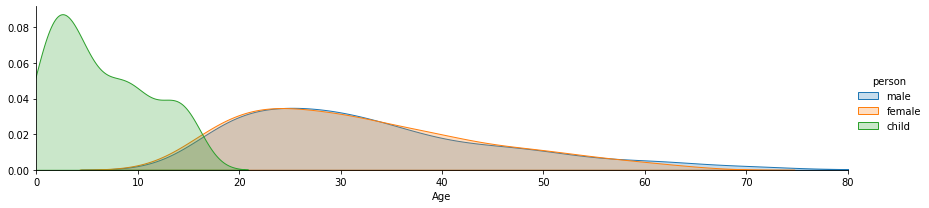

In [ ]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()
# set the figure limit for age from 0 to oldest
fig.set(xlim = (0, oldest))
# add figure legend
fig.add_legend()

###  Age Kernel Density Estimate for Class

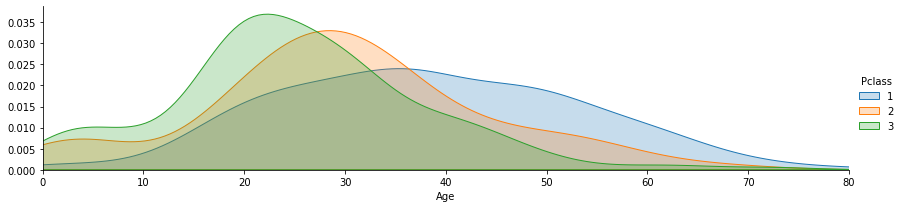

In [ ]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()
# set the figure limit for age from 0 to oldest
fig.set(xlim = (0, oldest))
# add figure legend
fig.add_legend()

### **Cabin**

In [ ]:
# drop null values from cabin column
deck = titanic_df['Cabin'].dropna()

In [ ]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

### Cabin Class Distribution

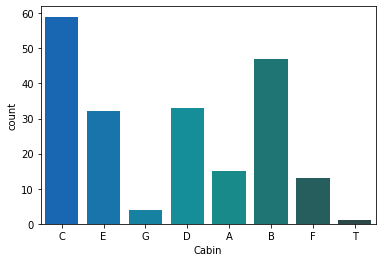

In [ ]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(x = 'Cabin', data = cabin_df, palette='winter_d')

(T) Cabin class doesnt make any sense. Thus, we will remove it from our plot

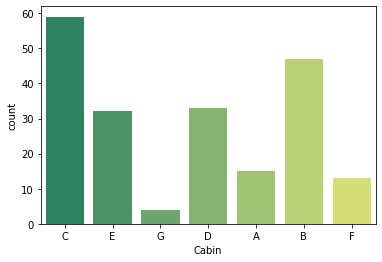

In [ ]:
cabin_df = cabin_df[cabin_df != 'T']
sns.countplot(x = 'Cabin', data = cabin_df, palette='summer')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


### **City**

### City and Class Distribution

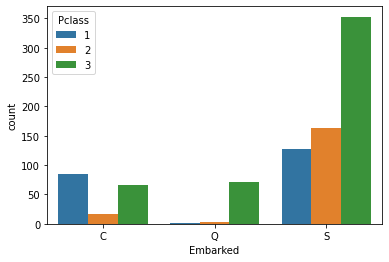

In [ ]:
sns.countplot(x = 'Embarked', data = titanic_df, hue = 'Pclass', order = ['C', 'Q', 'S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

### **Siblings and Parch**

In [ ]:
# add a new column to define alone
# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

### Set Alone Column to With Family or Alone

In [ ]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


### Alone or not Distribution

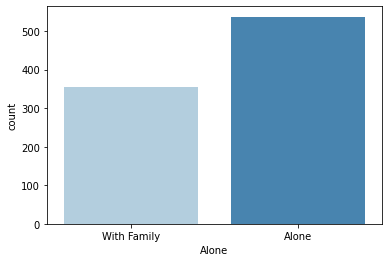

In [ ]:
sns.countplot(x = 'Alone', data = titanic_df, palette = 'Blues')

### **Survived or not**

In [ ]:
# Create new column Survivor and if Survived column = 0 put no, otherwise put yes
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

### Survivng Distribution

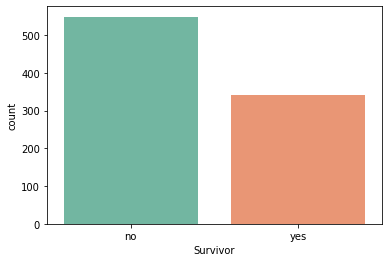

In [ ]:
sns.countplot(x = 'Survivor', data = titanic_df, palette = 'Set2')

### Survival among Classes

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


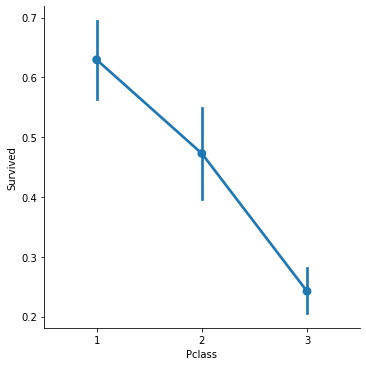

In [ ]:
sns.factorplot('Pclass', 'Survived', data = titanic_df)

### Survival among Classes and Person

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


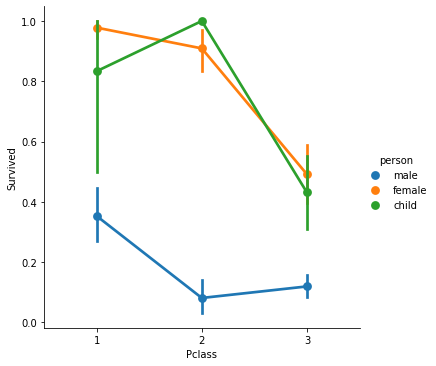

In [ ]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

### Relation between Age and Survival

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


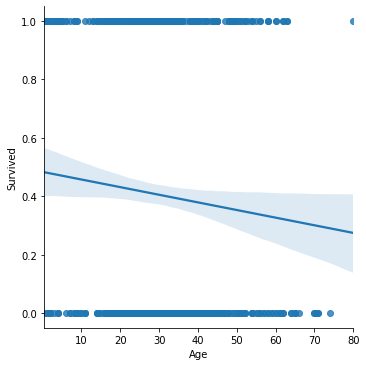

In [ ]:
sns.lmplot('Age','Survived',data=titanic_df)

The general trend was the older the passenger the less likely he survived

### Relation between Age ,Survival, and Class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


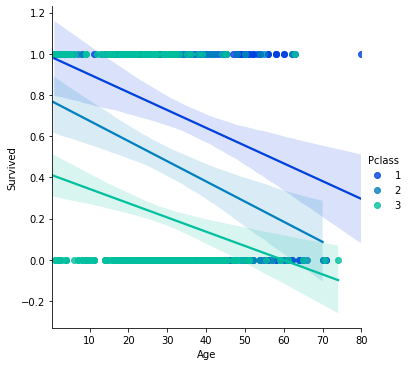

In [ ]:
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter')

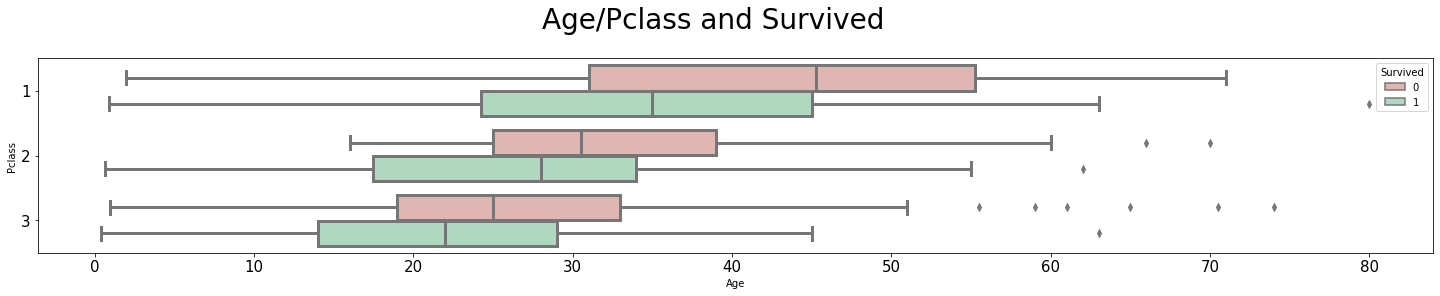

In [ ]:
fig = plt.figure(figsize=(25, 4))
ax = sns.boxplot(x="Age", y="Pclass",hue="Survived",data=screening_df, orient="h", palette={0: "#E6B0AA", 1:"#A9DFBF"}, linewidth = 3)
ax.tick_params(labelsize=15)
# add headline
fig.subplots_adjust(top=0.8)
fig.suptitle("Age/Pclass and Survived", fontsize="28");

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


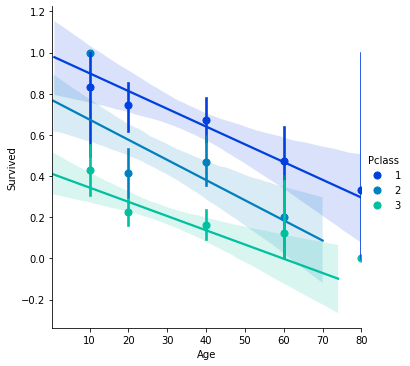

In [ ]:
# a list that will be used for x-axis to make the plot more clean
generations = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter', x_bins = generations)

### Relation between Gender, Age, and Survival

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


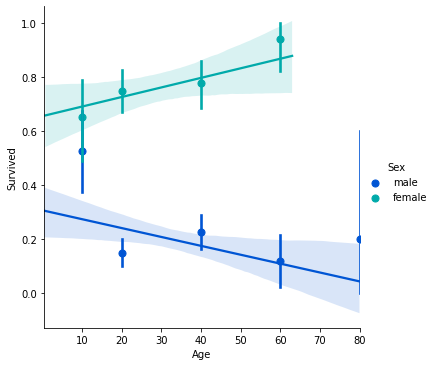

In [ ]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

### Age Distribution per Class and Gender

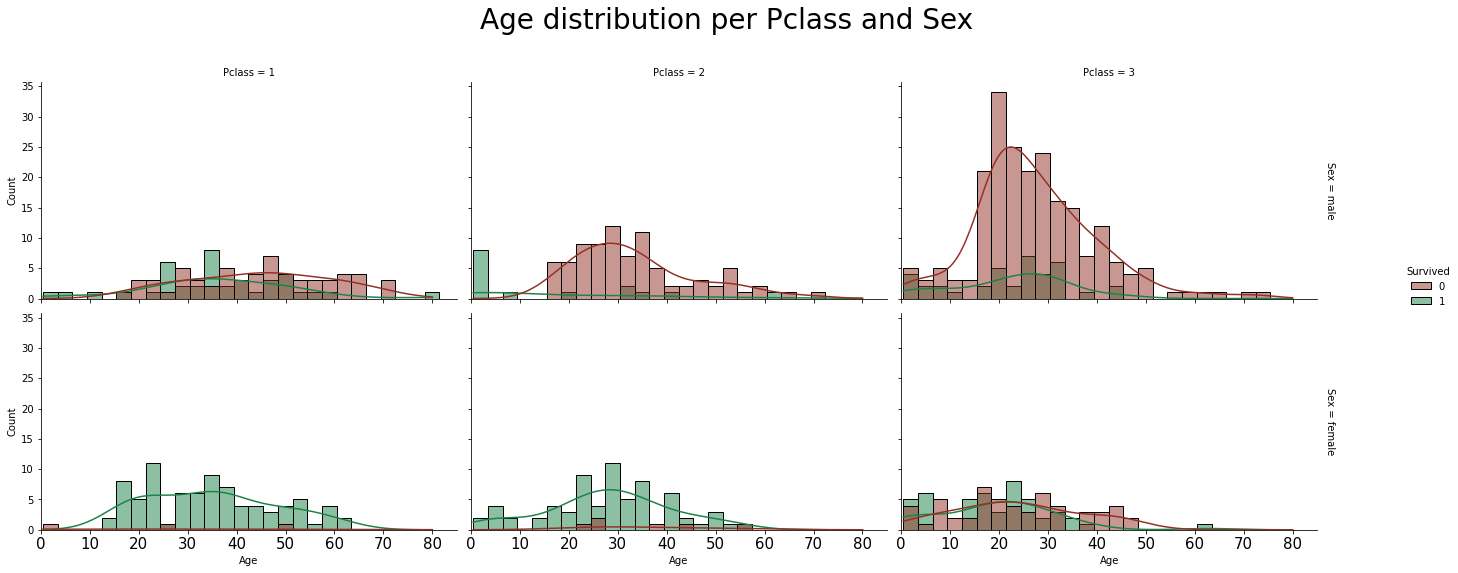

In [ ]:
fg = sns.displot(
    screening_df, x="Age", col="Pclass", row="Sex", kde=True, palette=survival_pal, hue = 'Survived',
    binwidth=3, height=4, facet_kws=dict(margin_titles=True), aspect=1.63, linewidth = 1)
fg.set_xticklabels(fontsize=15)
# change range for x axis
plt.xlim(0, 85)
# add headline
fg.fig.subplots_adjust(top=0.85)
fg.fig.suptitle('Age distribution per Pclass and Sex', fontsize="28");

### Survival Probability per Class and Gender

In [ ]:
# calculate the survival probability per class and sex
sex_class_prob_dict = {}
for n in ['male', 'female']:
    for m in [1,2,3]:
        df = screening_df[(screening_df['Pclass'] == m) & (screening_df['Sex'] == n)].copy()
        sex_class_prob_dict[f"{n} {str(m)}. class"] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)

# let's write a function for the probability visualization. we will need it later on.

def probability_visualization(prob_dict, title):
    df = pd.DataFrame.from_dict(prob_dict, orient='index').rename(columns={0: "survival_probability"})
    df['label'] = df.index
    fg = sns.catplot(data=df, kind="bar", y="label", x="survival_probability", height=5, color="#97A7B2",  aspect=3.9, linewidth = 3, ec="#424949")
    fg.set_xticklabels(fontsize=15)
    fg.set_yticklabels(fontsize=15)
    fg.fig.subplots_adjust(top=0.8)
    fg.fig.suptitle(title, fontsize="28");

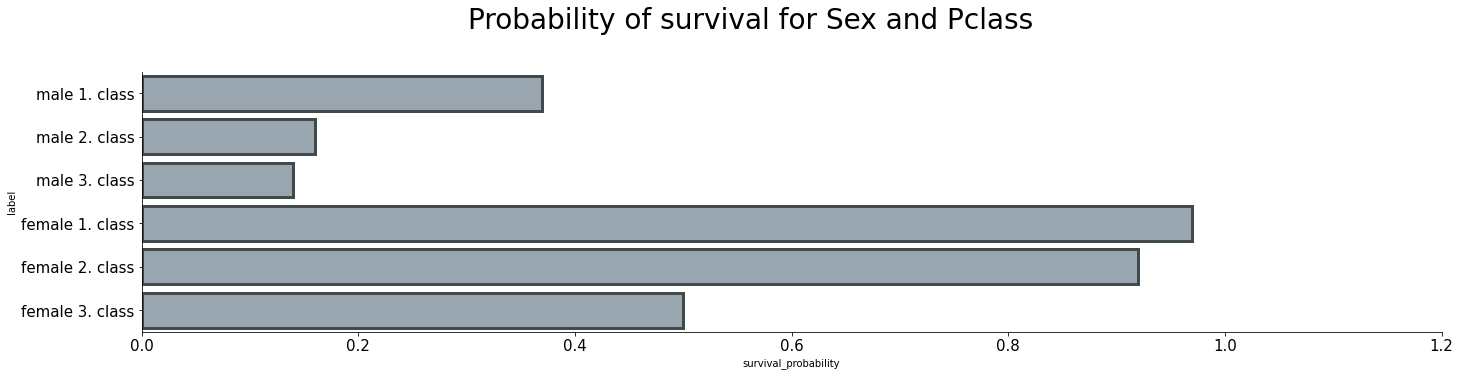

In [ ]:
probability_visualization(prob_dict=sex_class_prob_dict, title='Probability of survival for Sex and Pclass')

Based on the above plot, the female gender probability of survival was higher than male. Also, we can conclude that the higher the class the higher the probability of survival.

### **Feature Correlation**

Let's convert sex and embarked from sting to int. We will ignore Ticket, Name, and Cabin for this first look at the correlations.

In [ ]:
try:
    # convert male to 0 and female to 1
    sex_dict = {'male': 0, 'female': 1}
    # convert S to 1, C to 2, and Q to 3
    embarked_dict = {'S': 1, 'C': 2, 'Q': 3}
    # copy the filled embarked fields
    screening_df = screening_df[screening_df['Embarked'].notnull()].copy()
    screening_df.loc[:, 'Sex'] = screening_df.loc[:,'Sex'].map(lambda x: sex_dict[x])
    screening_df.loc[:, 'Embarked'] = screening_df.loc[:, 'Embarked'].map(lambda x: embarked_dict[x])
except:
    print('already converted')
# We will use one hot encoder later on. Otherwise the natural order of those numbers could irritate the ML algorithm.

already converted


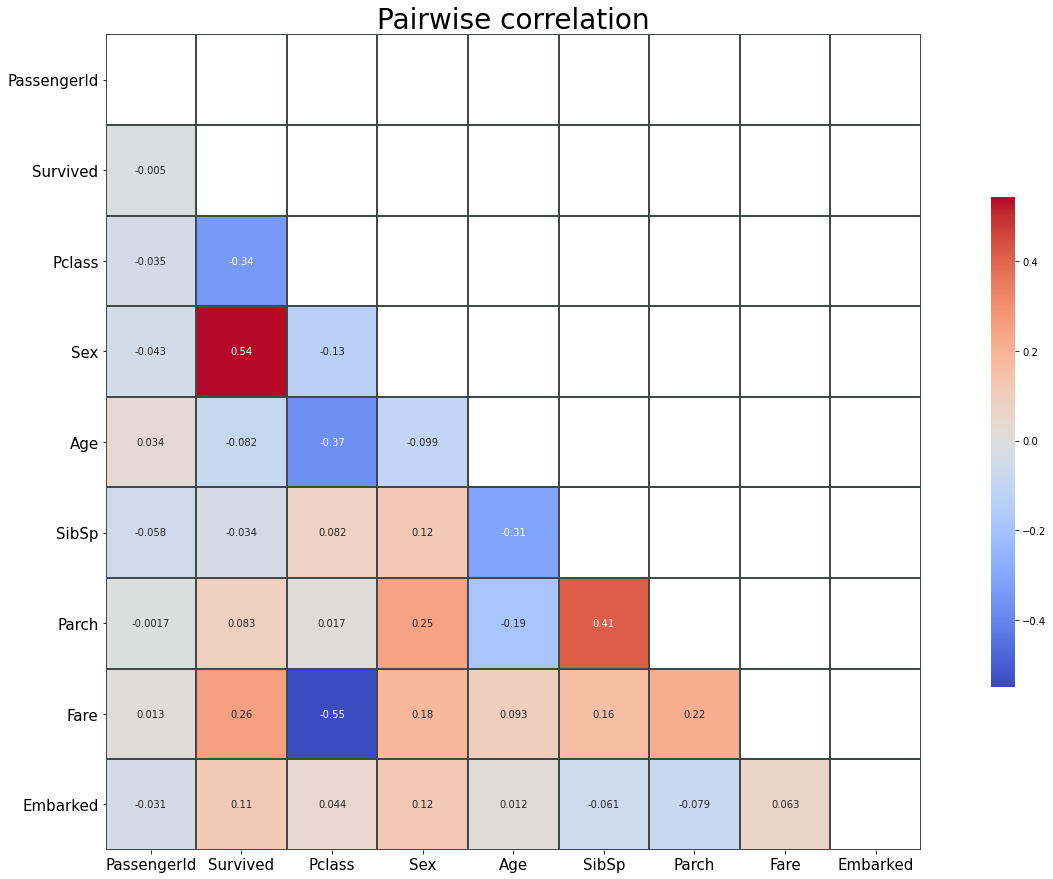

In [ ]:
# Correlations:
import numpy as np

# claculate correlations:
corr = screening_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# build figure
f, ax = plt.subplots(figsize=(25, 15))
# change x- and y-label size
ax.tick_params(axis='both', which='major', labelsize=15)
# plot mast
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, square=True, linewidths=1, linecolor="#424949", annot=True, 
                cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation', fontsize="28");

We see strong correlations between the features Survived and Pclass, Sex, Fare and Embarked.

## Feature Engineering

### **Ticket**


In [ ]:
# let's see if everyone has his own ticket.
combined_df['Ticket'].value_counts().nlargest(5)

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
PC 17608         7
Name: Ticket, dtype: int64

In [ ]:
combined_df[combined_df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


A family or other groups of people can share one ticket and in this case the value for Fare is biased.

In [ ]:
# split Ticket into two parts and move all numbers to Ticket_number if there is no space (' ') included. (workaround)
# we continue using the screening_df since we want to have a look at the chance of survival in each group.
tmp_df = screening_df['Ticket'].str.split(' ', 1, expand=True).copy()
tmp_df[1][tmp_df[1].isnull()] = tmp_df[0]
tmp_df[0][tmp_df[1] == tmp_df[0]] = 'no_prefix' 
screening_df[['Ticket_prefix', 'Ticket_number']]= tmp_df

In [ ]:
# top ten most common prefixes
screening_df['Ticket_prefix'].value_counts().nlargest(5)

no_prefix    663
PC            60
C.A.          27
STON/O        12
A/5           10
Name: Ticket_prefix, dtype: int64

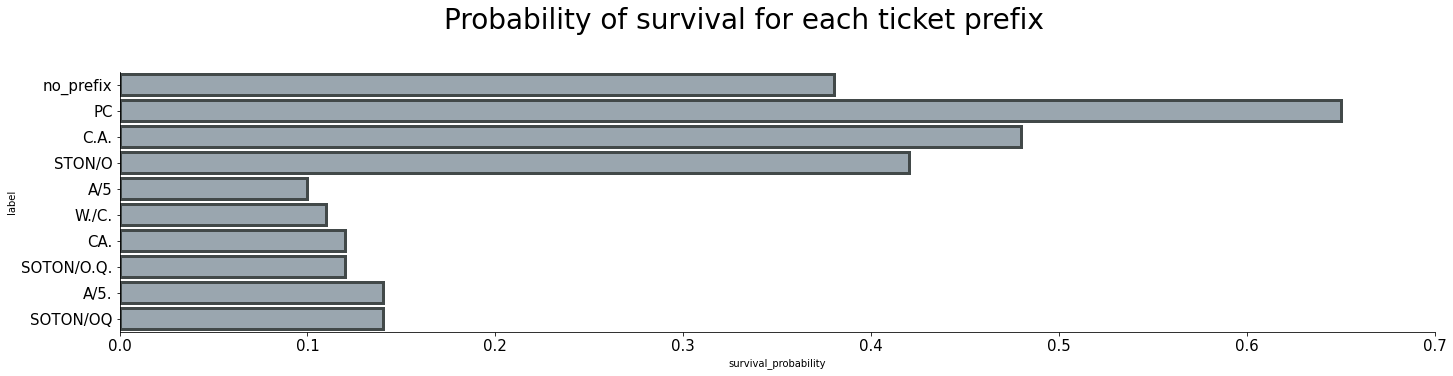

In [ ]:
# calculat survival probability for each group of Ticket_prefix
prefix_prob_dict = {}
for n in ['no_prefix', 'PC', 'C.A.', 'STON/O', 'A/5', 'W./C.', 'CA.', 'SOTON/O.Q.', 'A/5.', 'SOTON/OQ']:
    df = screening_df[screening_df['Ticket_prefix'] == n].copy()
    prefix_prob_dict[n] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)

# plot probabilities
probability_visualization(prob_dict=prefix_prob_dict, title='Probability of survival for each ticket prefix')

In [ ]:
screening_df['Leading_ticket_numbers'] = screening_df['Ticket_number'].map(lambda x : x[0:3])
screening_df['Leading_ticket_numbers'].value_counts().nlargest(5) 

349    53
347    48
113    45
310    36
174    23
Name: Leading_ticket_numbers, dtype: int64

The first three digits of each Ticket_number build groups of significant sizes.

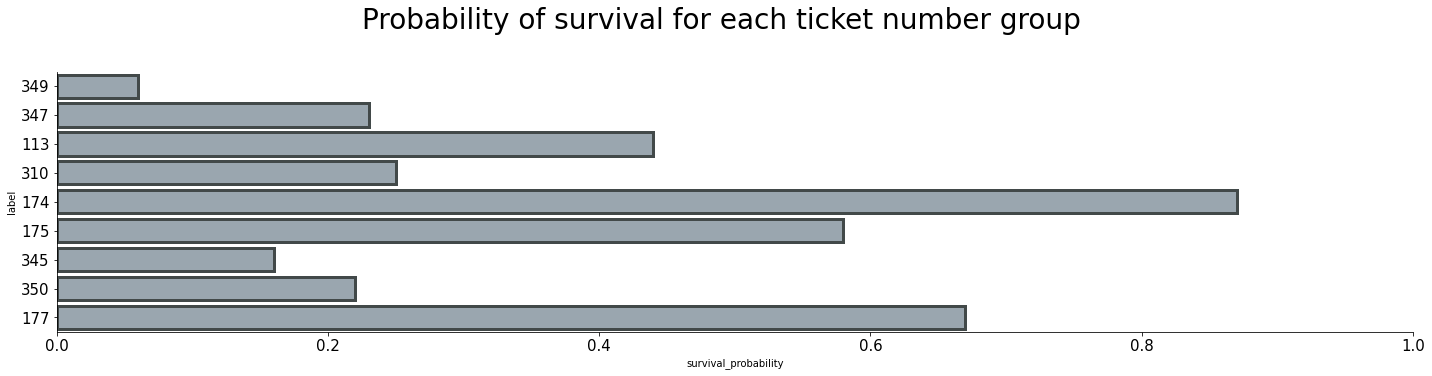

In [ ]:
# Calculate survival probabilities for each group with more than 15 members:
number_groups = [x[0] for x in screening_df['Leading_ticket_numbers'].value_counts().items() if x[1] > 15]
group_prob_dict = {}
for n in number_groups:
    df = screening_df[screening_df['Leading_ticket_numbers'] == n].copy()
    group_prob_dict[n] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)

# plot probabilities
probability_visualization(prob_dict=group_prob_dict, title='Probability of survival for each ticket number group')

This looks like valuable information. It also seems likely that the first digit of the Ticket_number in most cases represents the Pclass. Let's check on that and validate how many passengers are in those big groups.

### **New feature Fare_per_person and Group_size from Fare and Ticket**


In [ ]:
# add fare per person and group size fetures
screening_df['Fare_per_person'] = 0
screening_df['Group_size'] = 0

# fill the freatures with data
for index, row in screening_df.iterrows():
    # using the combined_df for group size
    group_size = combined_df['Ticket'].value_counts()[row['Ticket']]
    screening_df.at[index, 'Fare_per_person'] = row['Fare'] / group_size
    screening_df.at[index, 'Group_size'] = group_size

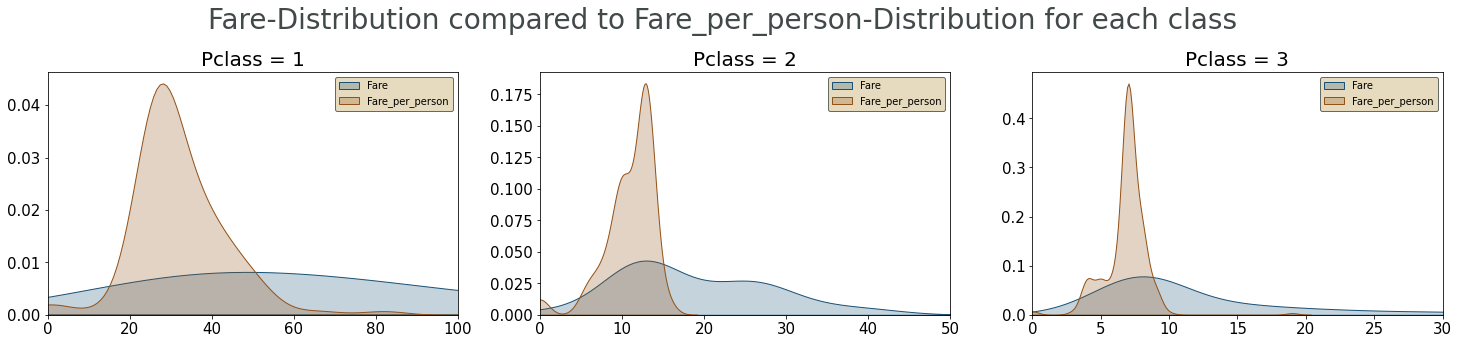

In [ ]:
# build figure
fig = plt.figure(figsize=(25,5))

# add grid to figure
gs = fig.add_gridspec(1,3)

# add subplots to grid:
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# set title for each subplot:
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# change labelsize for each axis:
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# set limits for x axis:
ax0.set_xlim(0, 100)
ax1.set_xlim(0, 50)
ax2.set_xlim(0, 30)

# plot:
sns.kdeplot(data=screening_df[screening_df['Pclass']==1], x="Fare", color="#1A5276", fill = True, ax=ax0, label="Fare").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==1], x="Fare_per_person", color="#935116", fill = True, ax=ax0, label="Fare_per_person", linewidth = 1).set(xlabel="", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==2], x="Fare", color="#1A5276", fill = True, ax=ax1, label="Fare").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==2], x="Fare_per_person", color="#935116", fill = True, ax=ax1, label="Fare_per_person").set(xlabel="", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==3], x="Fare", color="#1A5276", fill = True, ax=ax2, label="Fare").set(xlabel="Fare", ylabel="")
sns.kdeplot(data=screening_df[screening_df['Pclass']==3], x="Fare_per_person", color="#935116", fill = True, ax=ax2, label="Fare_per_person").set(xlabel="", ylabel="")

# add legend:
ax0.legend(facecolor="#E0D3AF", edgecolor="#424949")
ax1.legend(facecolor="#E0D3AF", edgecolor="#424949")
ax2.legend(facecolor="#E0D3AF", edgecolor="#424949")

# add headline:
fig.subplots_adjust(top=0.8)
fig.suptitle('Fare-Distribution compared to Fare_per_person-Distribution for each class', fontsize="28", color="#424949");

It seems that this is very near to the price distribution

In [ ]:
# befor we plot the correlations again we need to make shure that alle columns we want to inspekt are numerics.
# For this purpose, we must first map a few boundary values to convertible values and then convert the entire column. So lets count them and find a suitable new group.
print(45* "-")
print(f"# rows with Leading_ticket_numbers '2. : {len(screening_df[screening_df['Leading_ticket_numbers'] =='2. '])}")
print(f"# rows with Leading_ticket_numbers 'LIN: {len(screening_df[screening_df['Leading_ticket_numbers'] =='LIN'])}")
print(f"# rows with Leading_ticket_numbers Bas': {len(screening_df[screening_df['Leading_ticket_numbers'] =='Bas'])}")

---------------------------------------------
# rows with Leading_ticket_numbers '2. : 12
# rows with Leading_ticket_numbers 'LIN: 4
# rows with Leading_ticket_numbers Bas': 1


In [ ]:
# what about the class in tease groups?
print(60* "-")
print(f" Unique class values for Leading_ticket_numbers {'2. '}: {screening_df['Pclass'][screening_df['Leading_ticket_numbers'] =='2. '].unique()}")
print(f" Unique class values for Leading_ticket_numbers {'LIN'}: {screening_df['Pclass'][screening_df['Leading_ticket_numbers'] =='LIN'].unique()}")
print(f" Unique class values for Leading_ticket_numbers {'Bas'}: {screening_df['Pclass'][screening_df['Leading_ticket_numbers'] =='Bas'].unique()}")
print(60* "-")

------------------------------------------------------------
 Unique class values for Leading_ticket_numbers 2. : [3]
 Unique class values for Leading_ticket_numbers LIN: [3]
 Unique class values for Leading_ticket_numbers Bas: [2]
------------------------------------------------------------


In [ ]:
# lets just use 301, 302 and 201 as Leading_ticket_numbers for these values then. (We remember that the first number usually corresponded to the Pclass)
# Are 301, 302 amd 201 already taken?
print(45* "-")
print(f"# rows with Leading_ticket_numbers 301: {len(screening_df[screening_df['Leading_ticket_numbers'] =='301'])}")
print(f"# rows with Leading_ticket_numbers 302: {len(screening_df[screening_df['Leading_ticket_numbers'] =='302'])}")
print(f"# rows with Leading_ticket_numbers 201: {len(screening_df[screening_df['Leading_ticket_numbers'] =='201'])}")
print(45* "-")

---------------------------------------------
# rows with Leading_ticket_numbers 301: 0
# rows with Leading_ticket_numbers 302: 0
# rows with Leading_ticket_numbers 201: 0
---------------------------------------------


In [ ]:
# Looks good. Let's adjust the values and cast Leading_ticket_number.
screening_df.loc[screening_df['Leading_ticket_numbers'] =='2. ', 'Leading_ticket_numbers']  = 301
screening_df.loc[screening_df['Leading_ticket_numbers'] =='LIN', 'Leading_ticket_numbers']  = 301
screening_df.loc[screening_df['Leading_ticket_numbers'] =='Bas', 'Leading_ticket_numbers']  = 201
screening_df['Leading_ticket_numbers'] = screening_df['Leading_ticket_numbers'].astype(int)

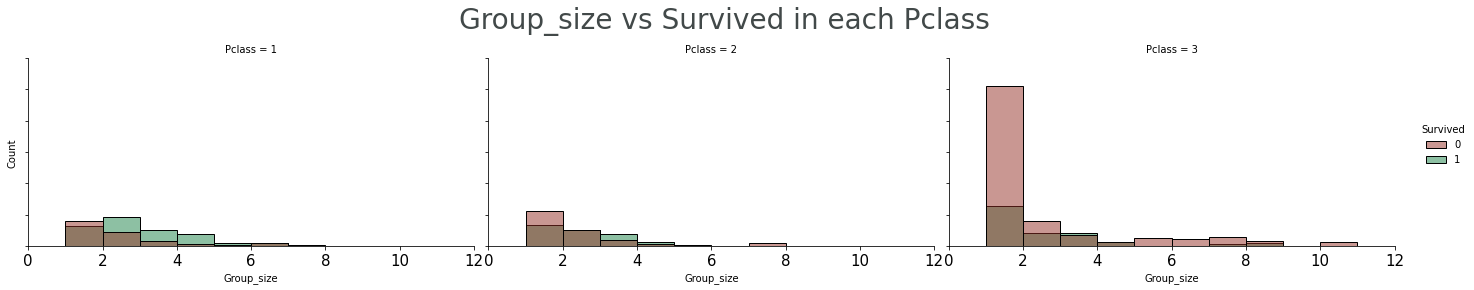

In [ ]:
fg = sns.displot(
    screening_df, x="Group_size", col="Pclass", palette=survival_pal, hue = 'Survived',
    binwidth=1, height=4, aspect=1.67)

# set label size for x and y labels
fg.set_xticklabels(fontsize=15)
fg.set_yticklabels(fontsize=15)

# add headline
fg.fig.subplots_adjust(top=0.8)
fg.fig.suptitle('Group_size vs Survived in each Pclass', fontsize="28", color="#424949");

### **Child Feature**

In [ ]:
# building feature
screening_df.loc[screening_df['Age'] <= 16, 'Child'] = 1
screening_df.loc[screening_df['Age'] > 16, 'Child'] = 0

In [ ]:
screening_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_prefix,Ticket_number,Leading_ticket_numbers,Fare_per_person,Group_size,Child
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,A/5,21171,211,7,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,PC,17599,175,35,2,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,STON/O2.,3101282,310,7,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,no_prefix,113803,113,26,2,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,no_prefix,373450,373,8,1,0.0


We added a new column for the child feature

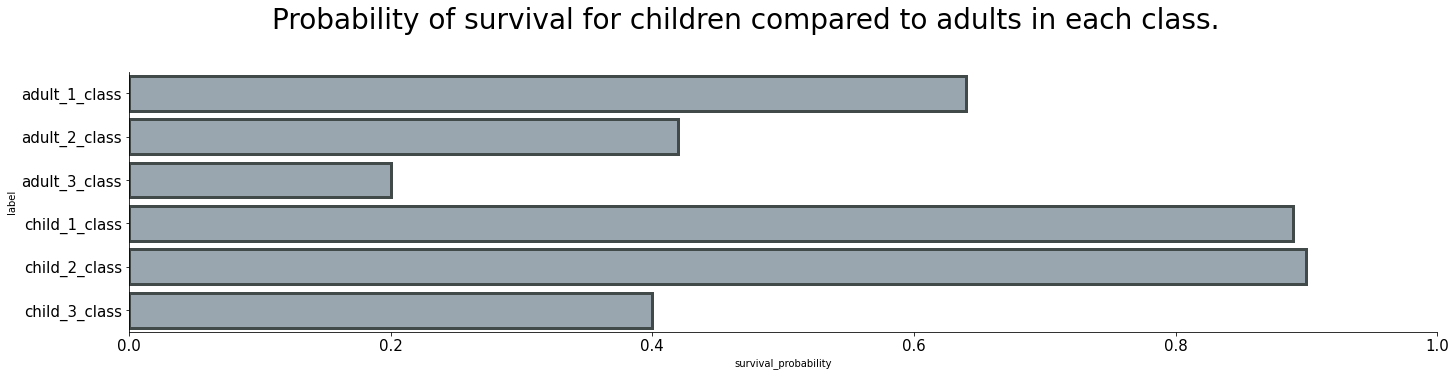

In [ ]:
# claculate probabilites for survival for childs in groups
child_prob_dict = {}
for n in [0, 1]:
    for p in [1, 2, 3]:
        df = screening_df[(screening_df['Child'] == n) & (screening_df['Pclass'] == p)].copy()
        if n == 1:
            dict_key= f"child_{p}_class"
        else:
            dict_key= f"adult_{p}_class"
        child_prob_dict[dict_key] = round(len(df[df['Survived'] == 1]) / len(df['Survived']),2)
        
# plot probabilities
probability_visualization(prob_dict=child_prob_dict, title='Probability of survival for children compared to adults in each class.')

### **Correlation with New Features**

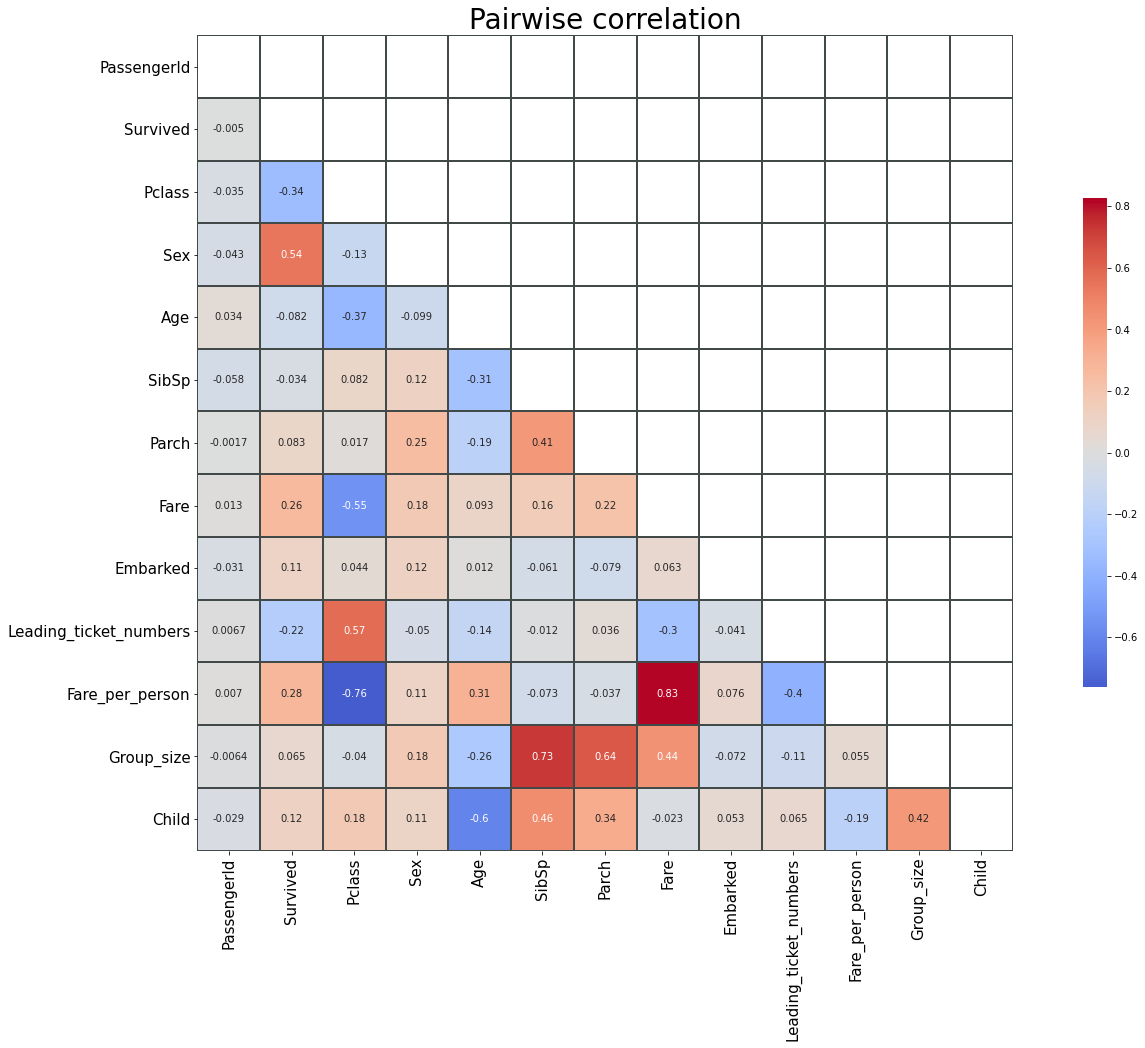

In [ ]:
# calculate correlations
corr_2 = screening_df.corr()

# plot correlations
mask = np.triu(np.ones_like(corr_2, dtype=bool))
f, ax = plt.subplots(figsize=(25, 15))
ax.tick_params(axis='both', which='major', labelsize=15)
g = sns.heatmap(corr_2, mask=mask, cmap="coolwarm", center=0, square=True, linewidths=1, linecolor="#424949", annot=True,
            cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation', fontsize="28")

## Data pre Processing

Notes:
* We have some missing Age values and since there is some correlation between Age, Pclass and Sex we should use this group to fill those missing values.
* There are two missing Embarked values in the training data but not in the test data. So we can just drop these two lines.
* There is one missing Fare value in the Test data. We can simply group by Pclass, Sax to fill this value.
* Categorical features like Sex and Embarked are important and using integer encoding alone might not be a good idear since there is no order in theas features.
* Other important features like Pclass, Leading_ticket_numbers and Group_size are ordert. So we probably don't need to use one hot encoding on those features.
Group_size combinds informations of SibSp and Parch and could replace them.
* We also know that Fare is the price of one ticket and this can include up to 9 passengers. Even if there is no strong evidence that Fare_per_person holds more information we will include it in our model.
* Furthermore we will drop PassengerId, Name, SibSp, Cabin, Ticket and Fare. There is no strong indication that PassengerId and Name includes valuable information. SibSp is included in Group_size and Cabin has too many missing values. Ticket on the other hand includes a lot of information but we will only use the first three numbers without any prefix as categorical feature. Fare will be replaced bei Fare_per_person
* We will also add the Child feature and use one hot incoding for Sex and Embarked.
* Last but not least, we should normalize Age and Fare_per_person

In [ ]:
def copy_df(df):
    return df.copy()

def fill_age(df):
    df.loc[:, "Age"] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) 
    return df

def drop_missing_embarked_rows(df): 
    return df[df['Embarked'].notnull()]

def fill_fare(df):
    df.loc[:, "Fare"] = df.groupby(['Pclass', 'Sex']).transform(lambda x: x.fillna(x.mean())) 
    return df

def drop_columns(df, columns): 
    df.drop(columns=columns, inplace=True)
    return df

def add_leading_ticket_number_feature(df):
    tmp_df = df['Ticket'].str.split(' ', 1, expand=True).copy()
    tmp_df[1][tmp_df[1].isnull()] = tmp_df[0]
    tmp_df['Leading_ticket_numbers'] = tmp_df[1].map(lambda x : x[0:3])
    df['Leading_ticket_numbers'] = tmp_df['Leading_ticket_numbers'].copy()
    return df

# convert ticket number to int
def cast_leading_ticket_number_to_int(df):
    df.loc[df['Leading_ticket_numbers'] =='2. ', 'Leading_ticket_numbers']  = 301
    df.loc[df['Leading_ticket_numbers'] =='LIN', 'Leading_ticket_numbers']  = 301
    df.loc[df['Leading_ticket_numbers'] =='Bas', 'Leading_ticket_numbers']  = 201
    df['Leading_ticket_numbers'] = df['Leading_ticket_numbers'].astype(int)
    return df
    
def add_group_size_feature(df):
    df['Group_size'] = 0.
    for index, row in df.iterrows():
        df.at[index, 'Group_size'] =  combined_df['Ticket'].value_counts()[row['Ticket']]
    return df

def add_fare_per_person_feature(df):
    df['Fare_per_person'] = 0.
    for index, row in df.iterrows():
        df.at[index, 'Fare_per_person'] = row['Fare'] / combined_df['Ticket'].value_counts()[row['Ticket']]
    return df

def add_child_feature(df):
    df.loc[df['Age'] <= 9, 'Child'] = 1
    df.loc[df['Age'] > 9, 'Child'] = 0
    df['Child'] = df['Child'].astype(int)
    return df

def one_hot_encoding(df, column):
    # Get one hot encoding of columns B
    one_hot_df = pd.get_dummies(df[column])
    # Drop input column as it is now encoded
    df = df.drop(column, axis=1)
    # Join the encoded df
    df = df.join(one_hot_df)
    return df

def norm_col(df, column):
    df[column] = (df[column]-df[column].mean())/df[column].std() 
    return df

def pipeline(df):
    df = (df
          .pipe(copy_df)
          .pipe(fill_age)
          .pipe(fill_fare)
          .pipe(drop_missing_embarked_rows)
          .pipe(add_group_size_feature)
          .pipe(add_fare_per_person_feature)
          .pipe(add_child_feature)
          .pipe(add_leading_ticket_number_feature)
          .pipe(cast_leading_ticket_number_to_int)
          .pipe(one_hot_encoding, "Pclass")
          .pipe(one_hot_encoding, "Sex")
          .pipe(one_hot_encoding, "Embarked")
          .pipe(norm_col, "Age")
          .pipe(norm_col, "Fare_per_person")
          .pipe(norm_col, "Leading_ticket_numbers")
          .pipe(norm_col, "Group_size")
          .pipe(drop_columns, ['Name', 'PassengerId', 'Cabin', 'Ticket', 'SibSp', 'Fare']))
    return df        

### Data Before and After

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pipeline(train_df).head()

,Survived,Age,Parch,Group_size,Fare_per_person,Child,Leading_ticket_numbers,1,2,3,female,male,C,Q,S
0,0,-0.548944,0,-0.623507,-0.535136,0,-0.587229,0,0,1,0,1,0,0,1
1,1,0.658835,0,-0.067541,1.562287,0,-0.863965,1,0,0,1,0,1,0,0
2,1,-0.247000,0,-0.623507,-0.485271,0,0.173794,0,0,1,1,0,0,0,1
3,1,0.432376,0,-0.067541,0.890645,0,-1.340565,1,0,0,1,0,0,0,1
4,0,0.432376,0,-0.623507,-0.476036,0,0.658082,0,0,1,0,1,0,0,1


We converted all of our categorical data to numerical, and did some numerical processing for the data before training

## Train and Test

### **Split to Train/Test**


In [ ]:
from sklearn.model_selection import train_test_split

X_y = pipeline(train_df)
y = X_y['Survived'].copy()
# drop the target from X
X = drop_columns(X_y, 'Survived')

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

At this point it is very important to set the stratify properyt to y otherwise we might make a model more biased towards a particular class. Setting the stratify property to y causes the distribution between survived and not survived to be the same in y_test and y_train. So lets first approve that this is true.

In [ ]:
print("probabilitiey for survival in y_train:")
print(y_train.value_counts(normalize=True))
print("probabilitiey for survival in y_test:")
print(y_test.value_counts(normalize=True))

probabilitiey for survival in y_train:
0    0.617117
1    0.382883
Name: Survived, dtype: float64
probabilitiey for survival in y_test:
0    0.618834
1    0.381166
Name: Survived, dtype: float64


### **Training**


#### ***GradientBoostingClassifier***
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# build model
gbc = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.01,
     max_depth=3, verbose=0, random_state=1)
# train model
gbc.fit(X_train, y_train)
print("Performance on train data:", gbc.score(X_train, y_train))
print("Performance on test data:", gbc.score(X_test, y_test))

Performance on train data: 0.9429429429429429
Performance on test data: 0.8430493273542601


In [ ]:
def feature_importancy_plot(model, data):
    feat_imp = pd.Series(model.feature_importances_, data.columns).sort_values(ascending=False)
    fig = plt.figure(figsize=(25,5))
    ax = feat_imp.plot(kind='bar', color="#97A7B2", linewidth = 3, ec="#424949")
    ax.tick_params(labelrotation=45, axis="x")
    ax.tick_params(labelcolor="#424949", labelsize=15, axis="both")
    fig.subplots_adjust(top=0.8)
    fig.suptitle('Feature Importances', fontsize="28", color="#424949");
    plt.ylabel('Feature Importance Score', color="#424949")
    plt.xlabel('Features', color="#424949");

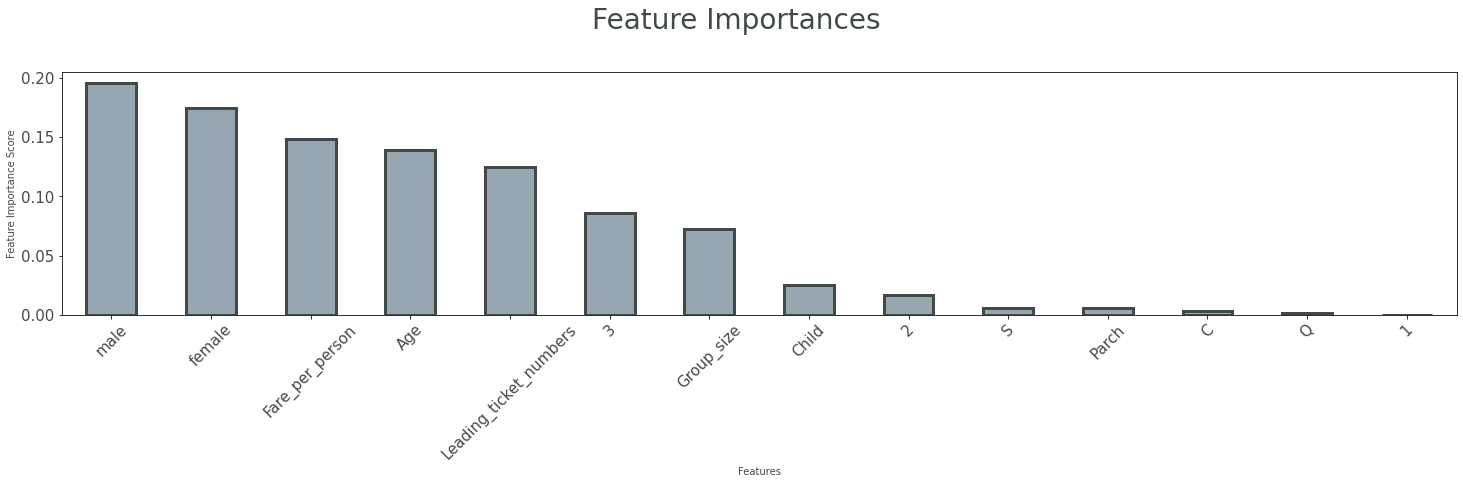

In [ ]:
feature_importancy_plot(model=gbc, data=X_train)

#### ***GridSearch***
This doesn't look so bad. Let's do a grid search to see if we can find better parameters for this problem.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test = {'max_depth':range(3,21,2),
              'min_samples_split':range(10, 51, 5),
              'subsample': [0.7, 0.8, 0.9, 1.0]}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01,
                                                              n_estimators=500,
                                                              max_features='sqrt',
                                                              random_state=1), 
param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)

# This takes around 20 mins on the kaggle kernal.
#gsearch.fit(X,y)
#gsearch.best_params_, gsearch.best_score_

# here is the result:
print("({'max_depth': 13, 'min_samples_split': 10, 'subsample': 0.9}, 0.8905325516361675)")

({'max_depth': 13, 'min_samples_split': 10, 'subsample': 0.9}, 0.8905325516361675)


In [ ]:
gbc2 = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=13,
    verbose=0,
    min_samples_split=10,
    subsample=0.9,
    max_features='sqrt')
gbc2.fit(X_train, y_train)
print("Performance on train data:", gbc2.score(X_train, y_train))
print("Performance on test data:", gbc2.score(X_test, y_test))

Performance on train data: 0.9924924924924925
Performance on test data: 0.8295964125560538


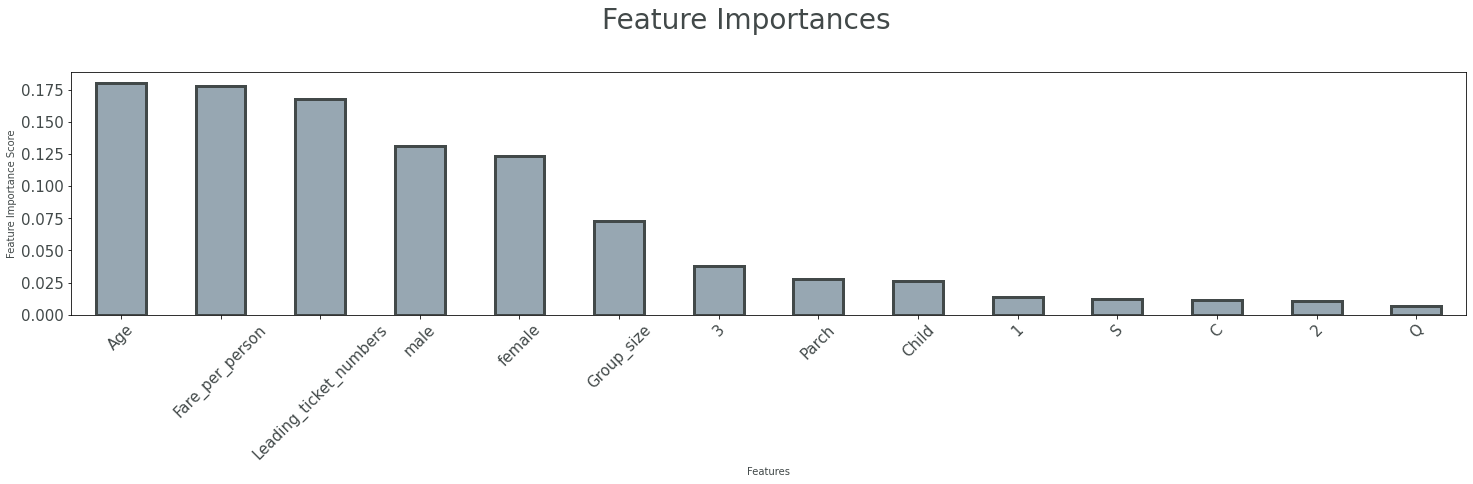

In [ ]:
feature_importancy_plot(model=gbc2, data=X_train)

In [ ]:
gbc_submission = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=13,
    verbose=0,
    min_samples_split=10,
    subsample=0.9,
    max_features='sqrt')
gbc_submission.fit(X, y);

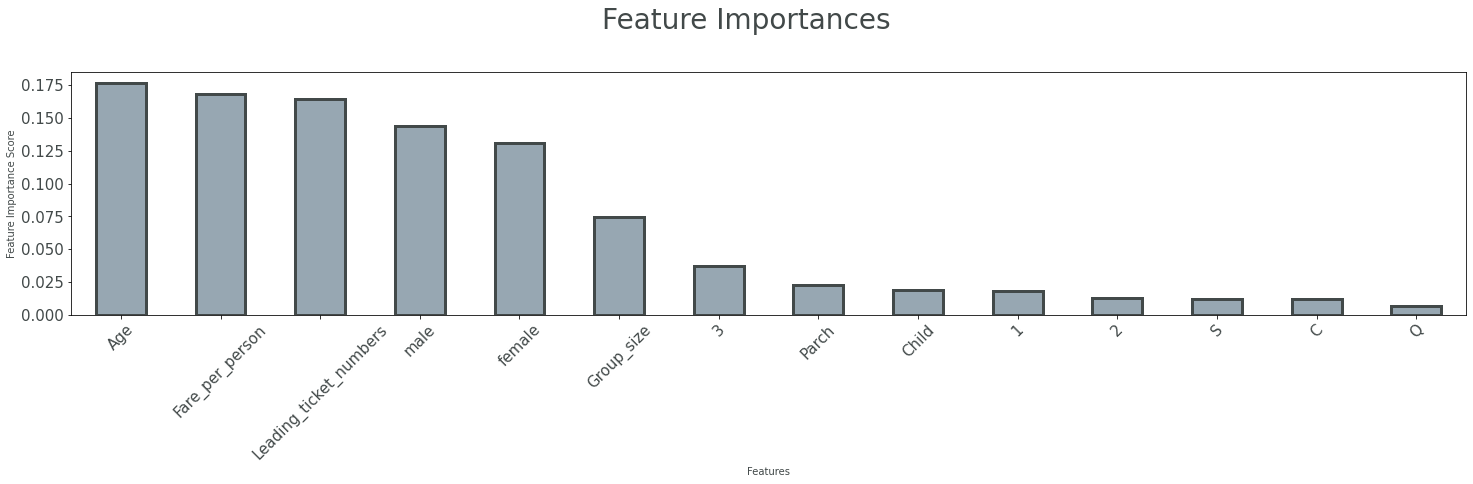

In [ ]:
feature_importancy_plot(model=gbc_submission, data=X)

### ***Logistic Regression***


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
logisticRegr = LogisticRegression(penalty='l1', solver='liblinear')
#fit the model
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predictions and score
predictions = logisticRegr.predict(X_test)
print(f"The score on the Test-dataset is {logisticRegr.score(X_test, y_test)}")
print(f"The score on the Train-dataset is {logisticRegr.score(X_train, y_train)}")

The score on the Test-dataset is 0.8430493273542601
The score on the Train-dataset is 0.8123123123123123


In [ ]:
def plot_confution_metrics(y_test,predictions):
    #condusion metrics
    cm = metrics.confusion_matrix(y_test, predictions)
    score = np.mean([y_test == predictions])
    #plot
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True,cbar = False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

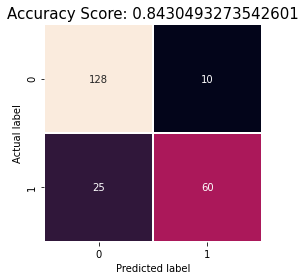

In [ ]:
#confusion metrics
plot_confution_metrics(y_test,predictions)

In [ ]:
#cross-val score
score = cross_val_score(logisticRegr, X_train, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.8063063063063063


In [ ]:
#store the cv-score
model_performance = {}
model_performance['Logistic Regression(Lasso)'] = score.mean()